# RealEstate Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import random
import math

In [4]:
newdf = pd.read_csv('batdongsan.com.vn.csv')

In [5]:
newdf.columns

Index(['id', 'month', 'project', 'investor', 'square', 'bedrooms', 'bathrooms',
       'direction', 'balcony', 'district', 'ward', 'price'],
      dtype='object')

In [6]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81163 entries, 0 to 81162
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         81163 non-null  int64  
 1   month      81162 non-null  float64
 2   project    78097 non-null  object 
 3   investor   65453 non-null  object 
 4   square     81162 non-null  float64
 5   bedrooms   81162 non-null  float64
 6   bathrooms  81162 non-null  float64
 7   direction  51086 non-null  object 
 8   balcony    54426 non-null  object 
 9   district   81162 non-null  object 
 10  ward       79506 non-null  object 
 11  price      81162 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 7.4+ MB


In [7]:
newdf.describe()

,id,month,square,bedrooms,bathrooms,price
count,8.116300e+04,81162.000000,81162.000000,81162.000000,81162.000000,81162.000000
mean,2.649457e+07,8.846702,83.481974,2.365602,1.897785,2404.748090
std,1.528779e+06,1.921548,25.662160,0.622283,0.404293,1038.825418
min,1.000000e+00,3.000000,7.000000,1.000000,1.000000,350.000000
25%,2.604670e+07,7.000000,66.000000,2.000000,2.000000,1520.000000
50%,2.669386e+07,9.000000,79.000000,2.000000,2.000000,2300.000000
75%,2.734829e+07,10.000000,98.000000,3.000000,2.000000,3150.000000
max,2.812856e+07,12.000000,296.000000,4.000000,4.000000,5000.000000


In [8]:
newdf.head()

,id,month,project,investor,square,bedrooms,bathrooms,direction,balcony,district,ward,price
0,28086120,12.0,Vinhomes Smart City Đại Mỗ,Tập đoàn Vingroup,60.0,3.0,1.0,Đông-Nam,Tây-Bắc,nam tu liem,dai mo,1560.0
1,28088954,12.0,Goldmark City,Công ty TNHH Thương mại - Quảng cáo - Xây dựng...,121.0,3.0,2.0,NaN,NaN,bac tu liem,phu dien,3300.0
2,28097966,12.0,Chung cư IEC Tứ Hiệp,NaN,70.0,2.0,2.0,Tây-Bắc,Đông-Nam,thanh tri,tu hiep,1106.0
3,27895887,12.0,Vinhomes D'Capitale,Tân Hoàng Minh Group,39.0,1.0,1.0,Đông-Nam,Đông-Nam,cau giay,trung hoa,1500.0
4,28056031,12.0,The Zen Residence,Công ty TNHH Gamuda Land Việt Nam,97.0,3.0,2.0,NaN,NaN,hoang mai,hoang liet,2900.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


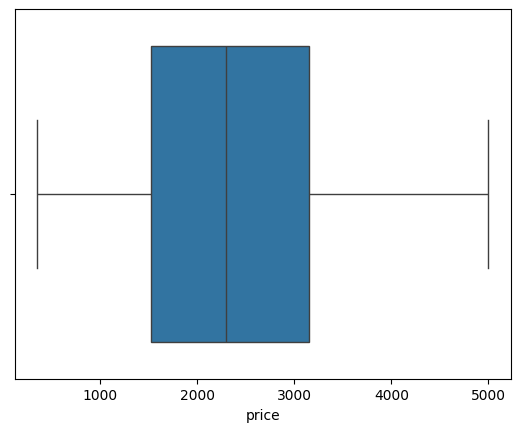

In [9]:
sns.boxplot(x = newdf['price'])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


<Axes: xlabel='square'>

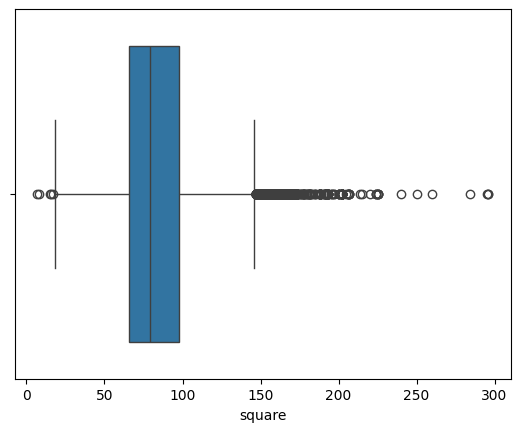

In [10]:
sns.boxplot(x = newdf['square'])


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


<Axes: xlabel='bedrooms'>

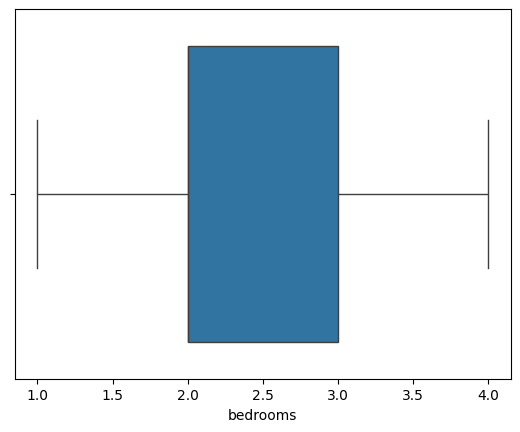

In [17]:
sns.boxplot(x = newdf['bedrooms'])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


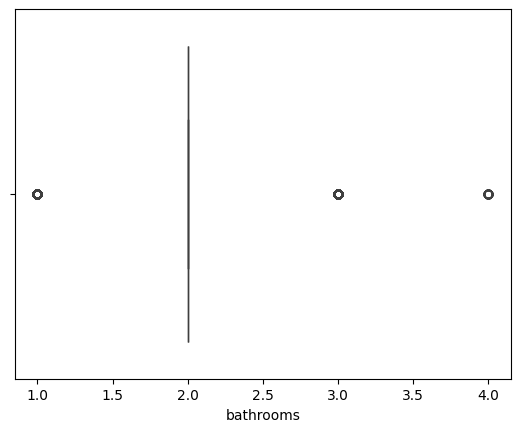

In [12]:
sns.boxplot(x = newdf['bathrooms'])
plt.show()

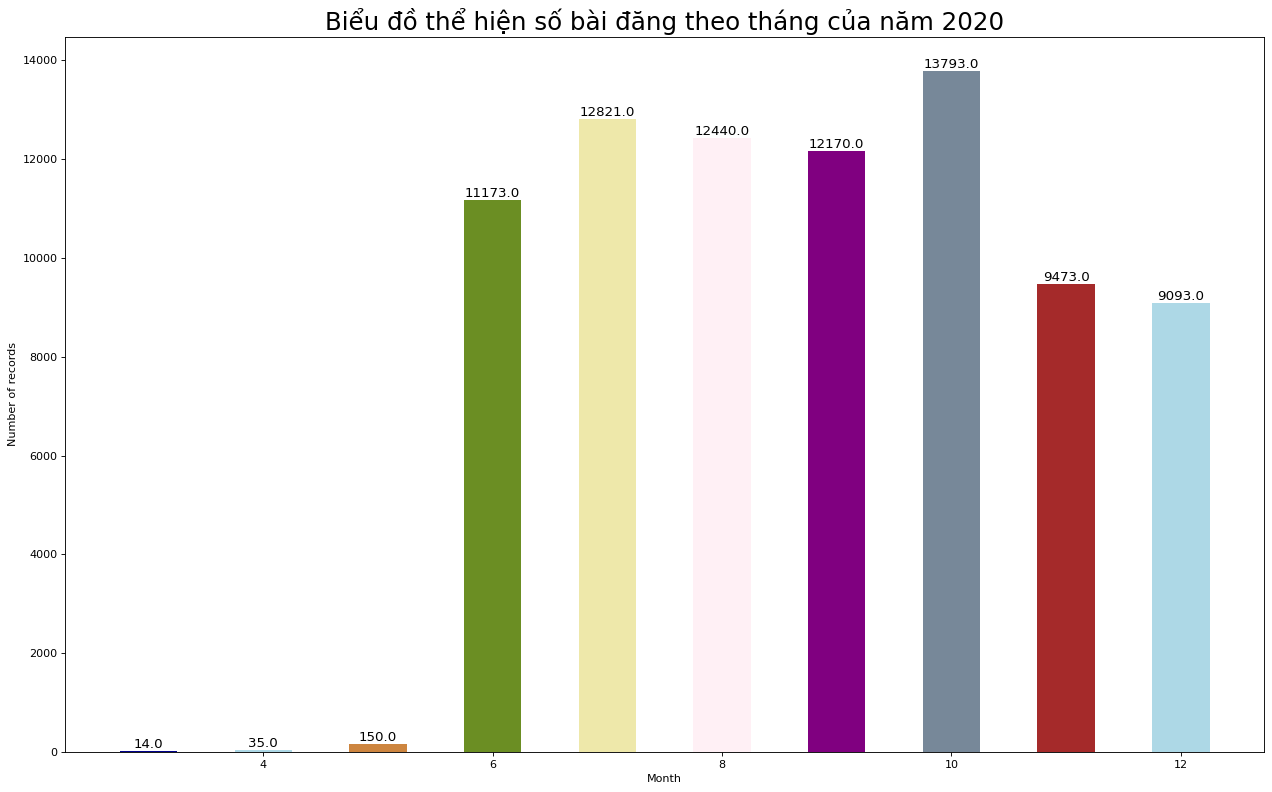

In [ ]:
import matplotlib.pyplot as plt
import random

df1 = newdf.groupby('month').size().reset_index(name = 'number_of_records')

n = df1['month'].unique().__len__()
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k = n)

plt.figure(figsize = (16, 10), dpi = 80)
bars = plt.bar(df1['month'], df1['number_of_records'], color = c, width = 0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height,                             
        f'{height:.1f}',                   
        ha = 'center', va = 'bottom',           
        fontsize =12, fontweight = 500 
    )

plt.title("Biểu đồ thể hiện số bài đăng theo tháng của năm 2020", fontsize = 22)
plt.ylabel("Number of records") 
plt.xlabel("Month")
plt.tight_layout()
plt.show()

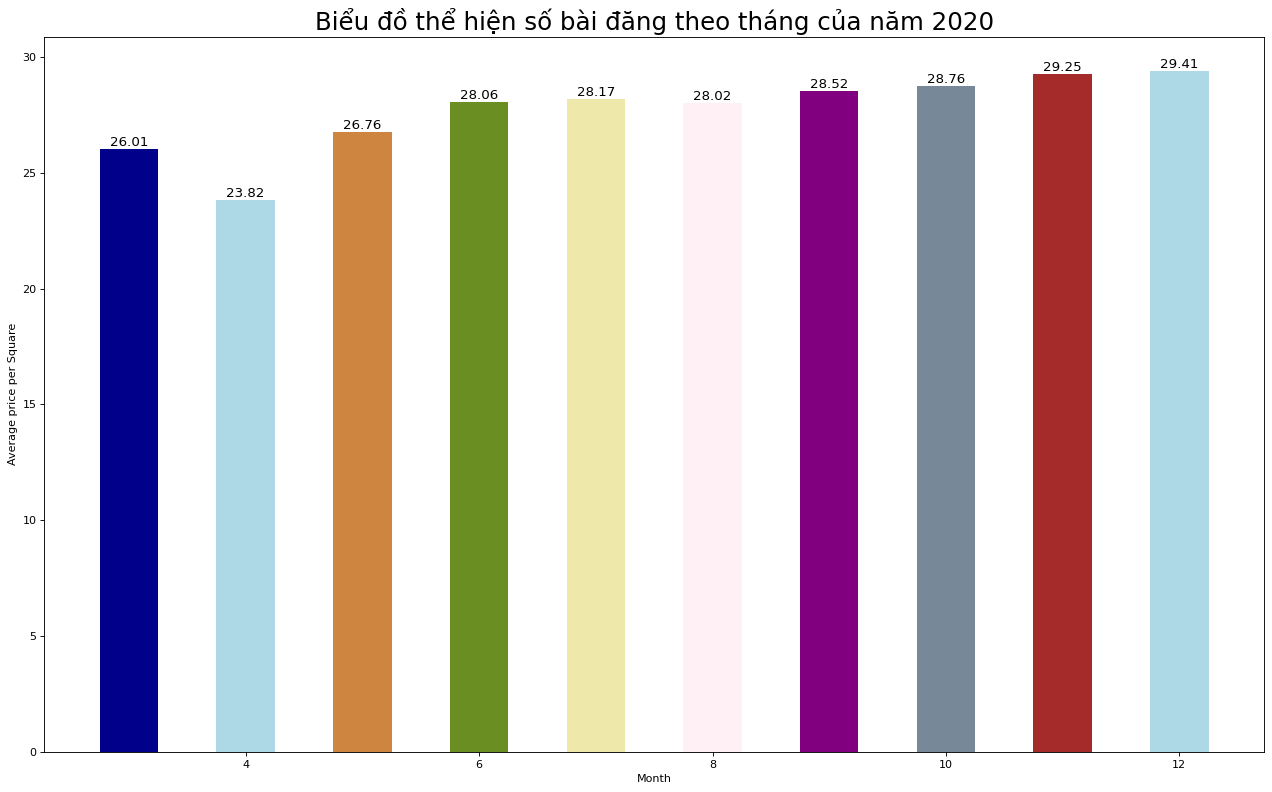

In [ ]:
newdf['price_per_square'] = newdf['price'] / newdf['square']

df2 = newdf.groupby('month')['price_per_square'].mean().reset_index(name = 'average_price_per_square')

n = df1['month'].unique().__len__()
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k = n)

plt.figure(figsize = (16, 10), dpi = 80)
bars = plt.bar(df1['month'], df2['average_price_per_square'], color = c, width = 0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height,                             
        f'{height:.2f}',                   
        ha = 'center', va = 'bottom',           
        fontsize = 12, fontweight = 500 
    )

plt.title("Biểu đồ thể hiện số bài đăng theo tháng của năm 2020", fontsize = 22)
plt.ylabel("Average price per Square") 
plt.xlabel("Month")
plt.tight_layout()
plt.show()

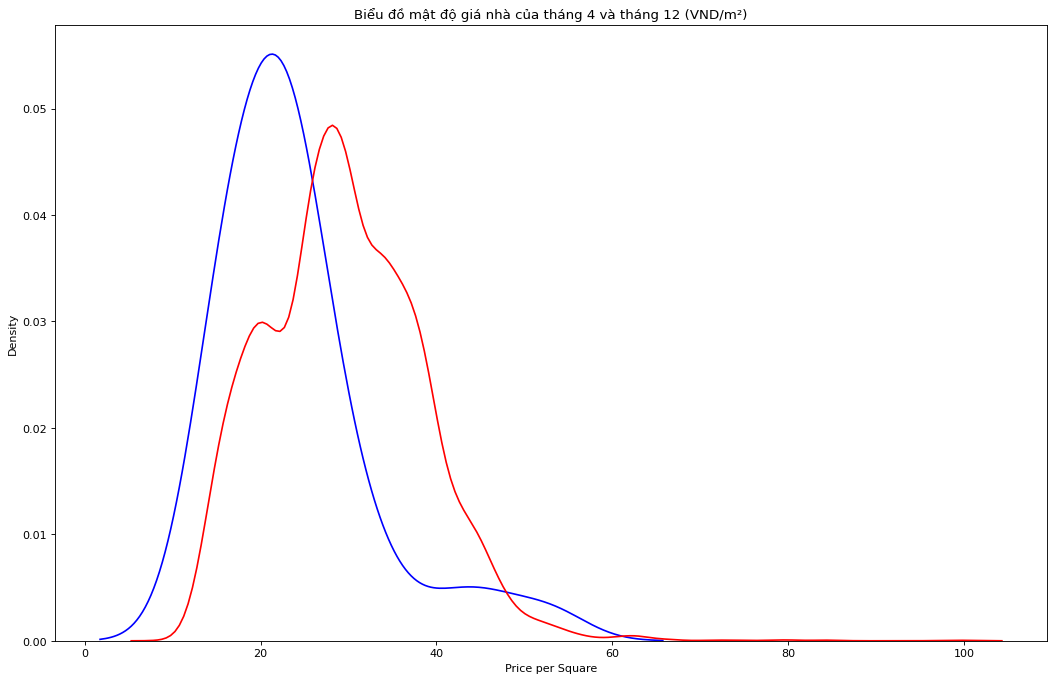

In [31]:
df_4 = newdf[newdf.month == 4]
df_12 = newdf[newdf.month == 12]

plt.figure(figsize = (16, 10), dpi = 80)
sns.kdeplot(df_4['price_per_square'], color = 'blue', label = 'April')
sns.kdeplot(df_12['price_per_square'], color = 'red', label = 'December')
plt.title('Biểu đồ mật độ giá nhà của tháng 4 và tháng 12 (VND/m²)')
plt.xlabel('Price per Square')
plt.ylabel('Density')
plt.show()

/var/folders/x9/zf9kk88j6wnc8jwvzqvyvv3r0000gn/T/ipykernel_54736/1945674889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_4['price_per_square'], color = 'blue', label = 'April')
/var/folders/x9/zf9kk88j6wnc8jwvzqvyvv3r0000gn/T/ipykernel_54736/1945674889.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

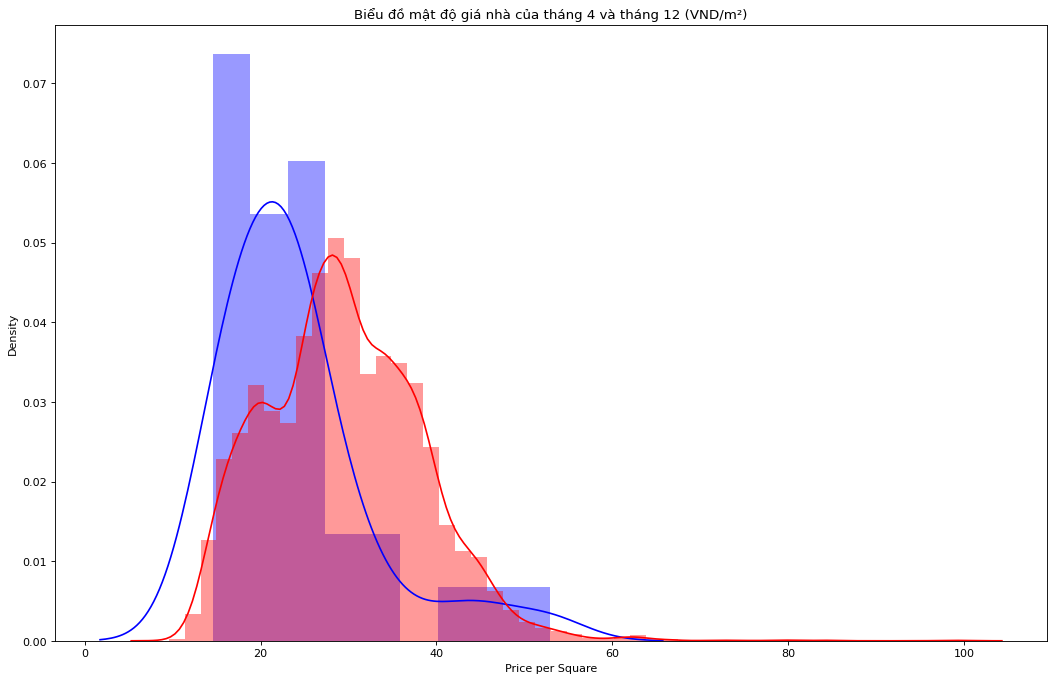

In [28]:
df_4 = newdf[newdf.month == 4]
df_12 = newdf[newdf.month == 12]

plt.figure(figsize = (16, 10), dpi = 80)
sns.distplot(df_4['price_per_square'], color = 'blue', label = 'April')
sns.distplot(df_12['price_per_square'], color = 'red', label = 'December')
plt.title('Biểu đồ mật độ giá nhà của tháng 4 và tháng 12 (VND/m²)')
plt.xlabel('Price per Square')
plt.ylabel('Density')
plt.show()

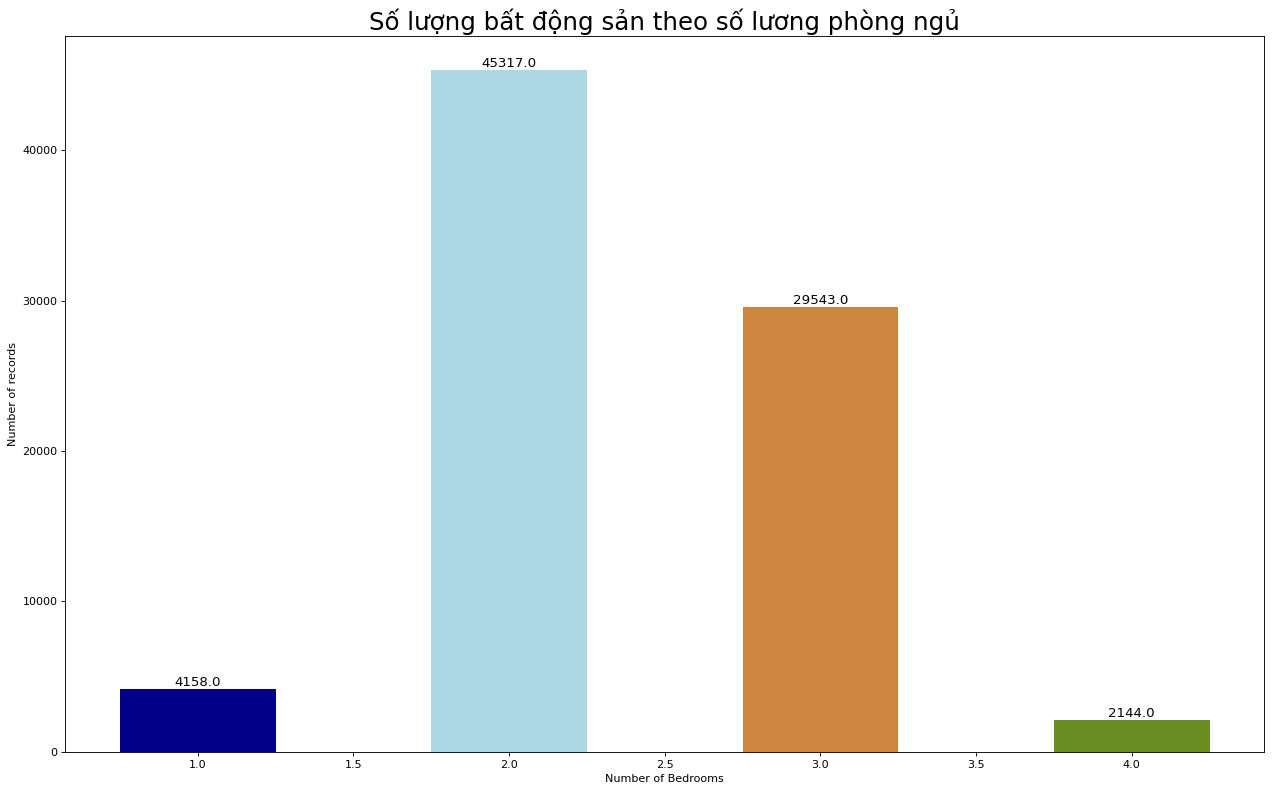

In [35]:
df3 = newdf.groupby('bedrooms').size().reset_index(name = 'number_of_records')

n = df3['bedrooms'].unique().__len__()
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k = n)

plt.figure(figsize = (16, 10), dpi = 80)
bars = plt.bar(df3['bedrooms'], df3['number_of_records'], color = c, width = 0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height,                             
        f'{height:.1f}',                   
        ha = 'center', va = 'bottom',           
        fontsize =12, fontweight = 500 
    )

plt.title("Số lượng bất động sản theo số lương phòng ngủ", fontsize = 22)
plt.ylabel("Number of records") 
plt.xlabel("Number of Bedrooms")
plt.tight_layout()
plt.show()

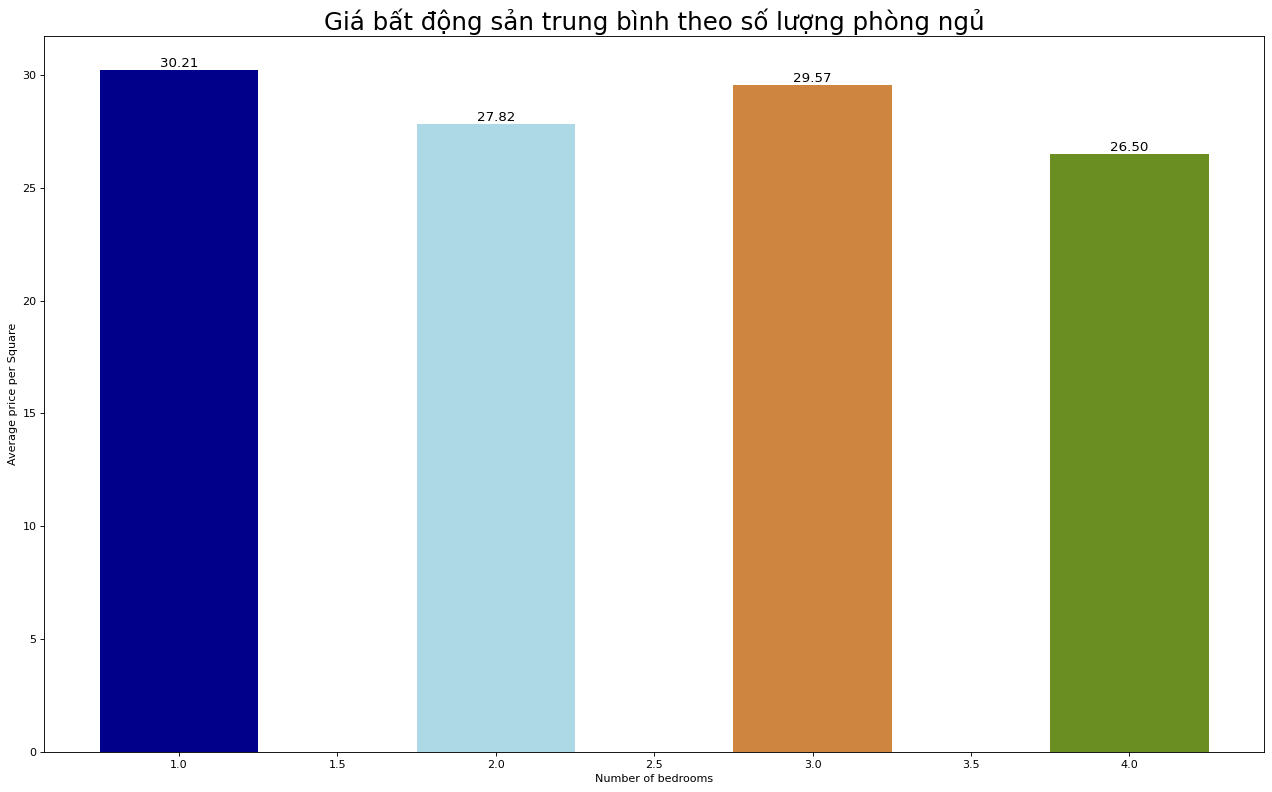

In [71]:
newdf['price_per_square'] = newdf['price'] / newdf['square']

df4 = newdf.groupby('bedrooms')['price_per_square'].mean().reset_index(name = 'average_price')

n = df4['bedrooms'].unique().__len__()
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k = n)

plt.figure(figsize = (16, 10), dpi = 80)
bars = plt.bar(df4['bedrooms'], df4['average_price'], color = c, width = 0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height,                             
        f'{height:.2f}',                   
        ha = 'center', va = 'bottom',           
        fontsize = 12, fontweight = 500 
    )

plt.title("Giá bất động sản trung bình theo số lượng phòng ngủ", fontsize = 22)
plt.ylabel("Average price per Square") 
plt.xlabel("Number of bedrooms")
plt.tight_layout()
plt.show()

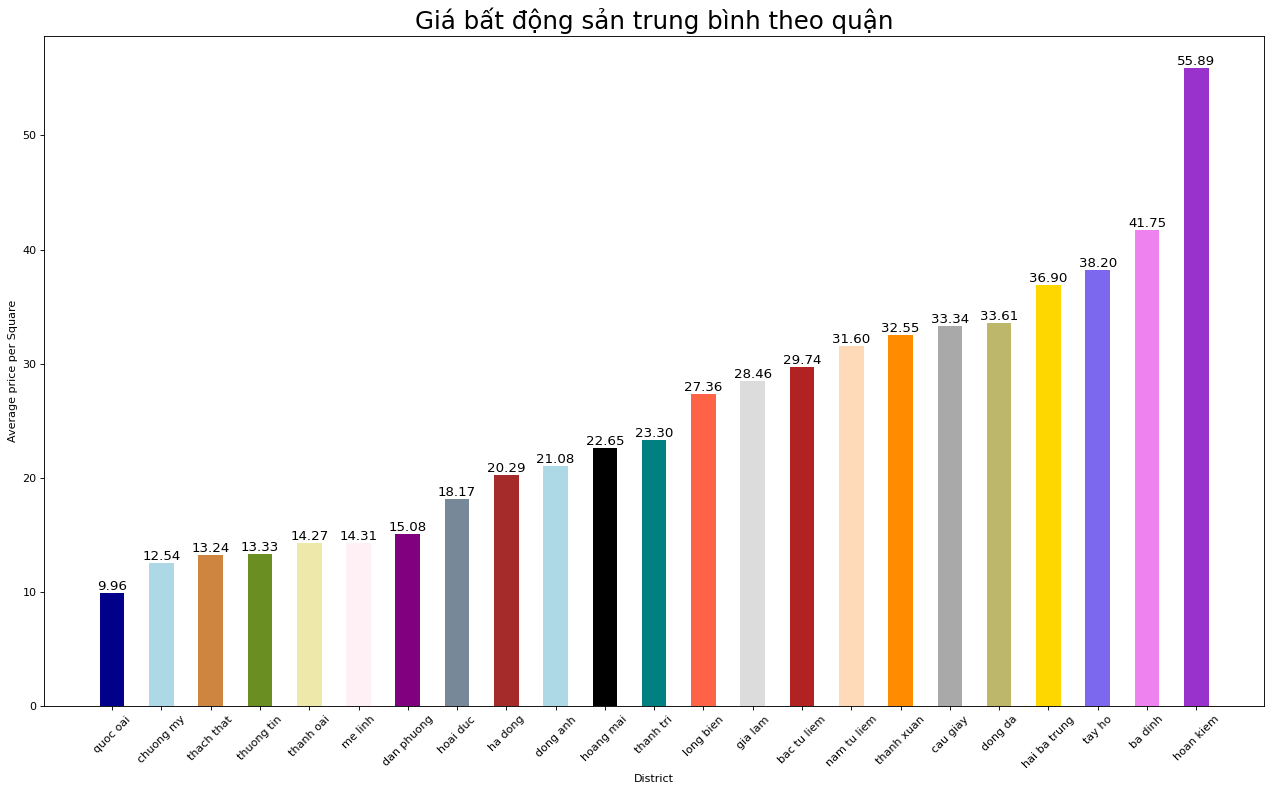

In [43]:
df5 = newdf.groupby('district')['price_per_square'].mean().reset_index(name = 'average_price').sort_values(by = 'average_price') 

n = df5['district'].unique().__len__()
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k = n)

plt.figure(figsize = (16, 10), dpi = 80)
bars = plt.bar(df5['district'], df5['average_price'], color = c, width = 0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height,                             
        f'{height:.2f}',                   
        ha = 'center', va = 'bottom',           
        fontsize = 12, fontweight = 500 
    )

plt.xticks(df5['district'], rotation = 45)
plt.title("Giá bất động sản trung bình theo quận", fontsize = 22)
plt.ylabel("Average price per Square") 
plt.xlabel("District")
plt.tight_layout()
plt.show()

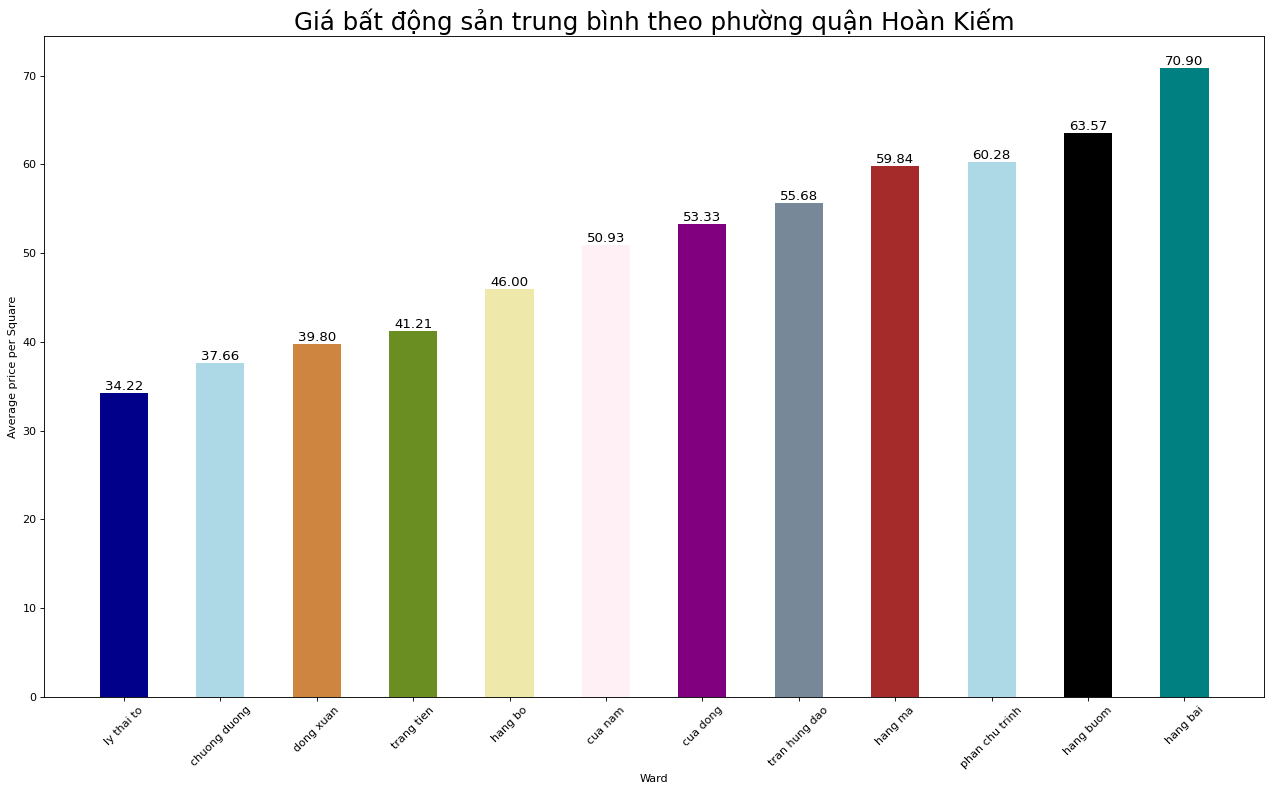

In [46]:
df6 = newdf[newdf['district'] == 'hoan kiem']
df6 = df6.groupby('ward')['price_per_square'].mean().reset_index(name = 'average_price').sort_values(by = 'average_price') 

n = df6['ward'].unique().__len__()
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k = n)

plt.figure(figsize = (16, 10), dpi = 80)
bars = plt.bar(df6['ward'], df6['average_price'], color = c, width = 0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height,                             
        f'{height:.2f}',                   
        ha = 'center', va = 'bottom',           
        fontsize = 12, fontweight = 500 
    )

plt.xticks(df6['ward'], rotation = 45)
plt.title("Giá bất động sản trung bình theo phường quận Hoàn Kiếm", fontsize = 22)
plt.ylabel("Average price per Square") 
plt.xlabel("Ward")
plt.tight_layout()
plt.show()

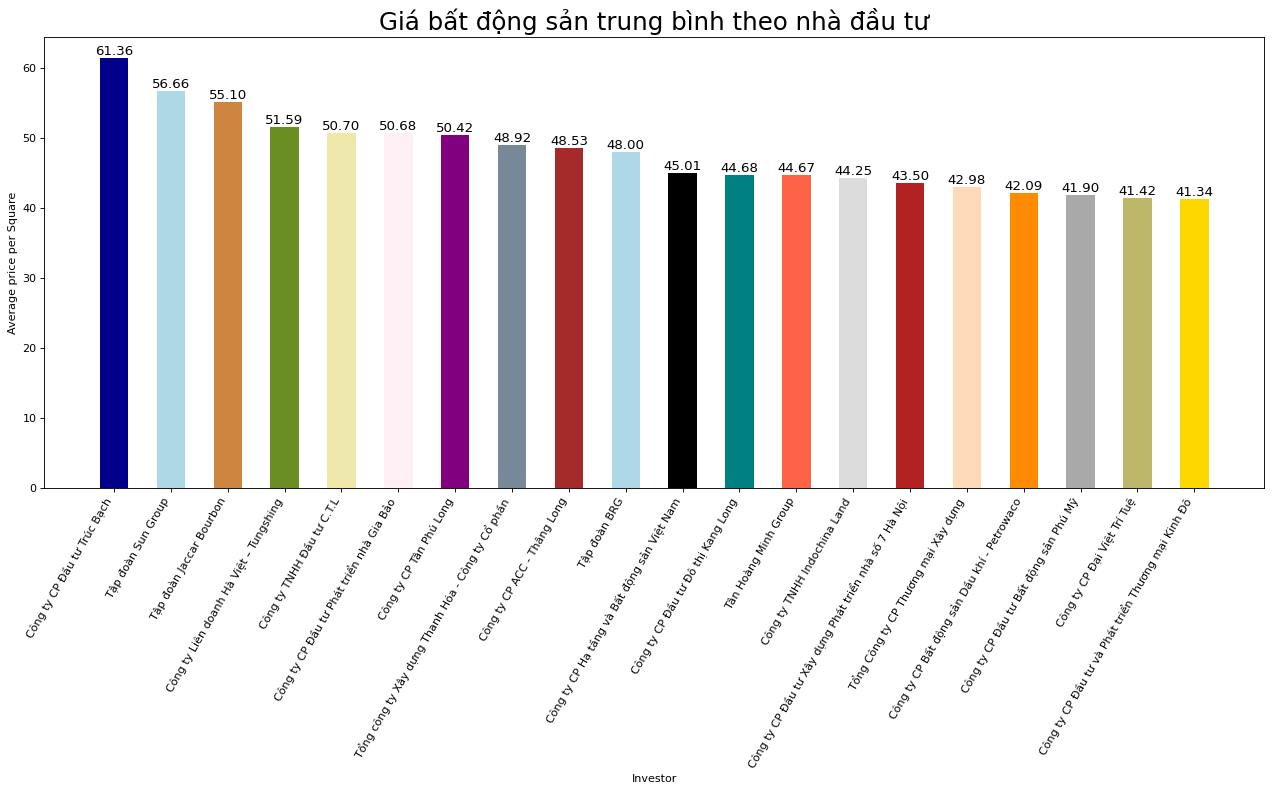

In [58]:
df7 = newdf.groupby('investor')['price_per_square'].mean().reset_index(name = 'average_price').sort_values(by = 'average_price', ascending= False).head(20)

n = df7['investor'].unique().__len__()
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k = n)

plt.figure(figsize = (16, 10), dpi = 80)
bars = plt.bar(df7['investor'], df7['average_price'], color = c, width = 0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height,                             
        f'{height:.2f}',                   
        ha = 'center', va = 'bottom',           
        fontsize = 12, fontweight = 500 
    )

plt.xticks(df7['investor'], rotation = 60, horizontalalignment= 'right')
plt.title("Giá bất động sản trung bình theo nhà đầu tư", fontsize = 22)
plt.ylabel("Average price per Square") 
plt.xlabel("Investor")
plt.tight_layout()
plt.show()

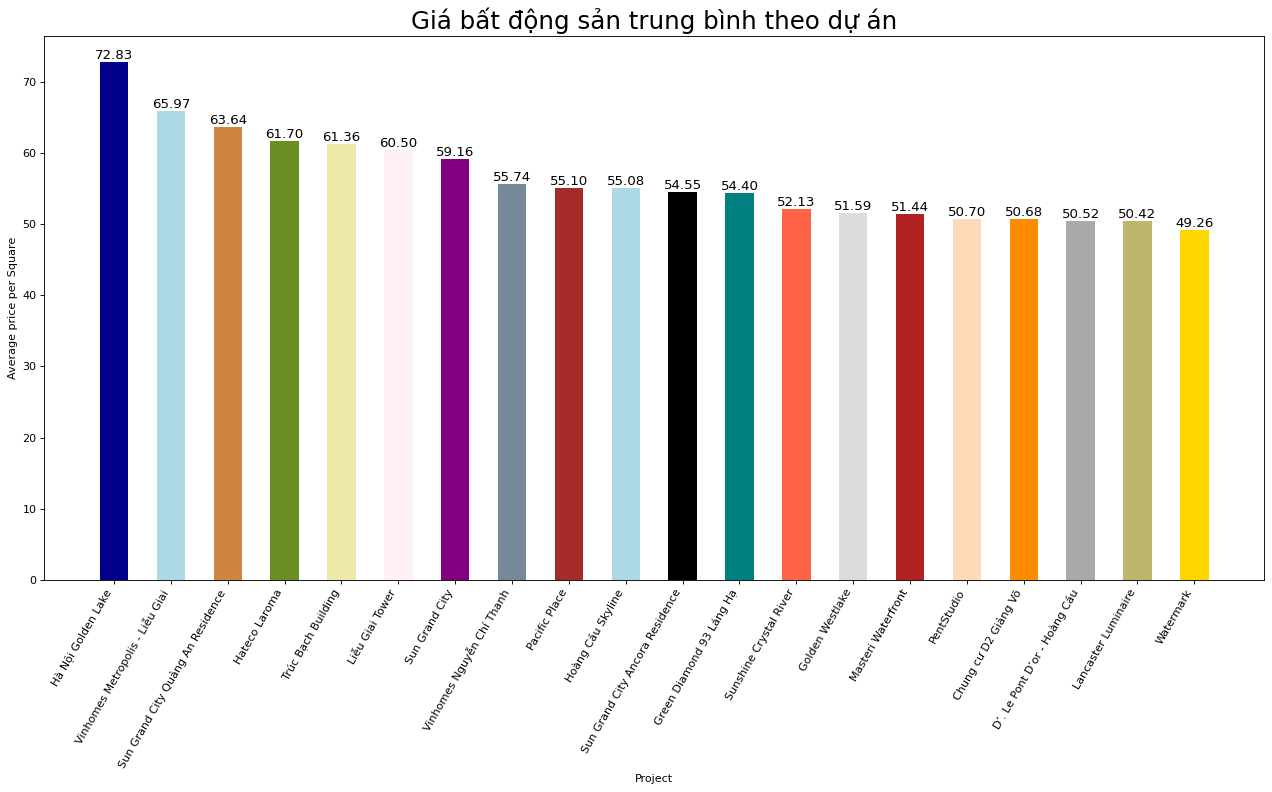

In [ ]:
df8 = newdf.groupby('project')['price_per_square'].mean().reset_index(name = 'average_price').sort_values(by = 'average_price', ascending= False).head(20)

n = df8['project'].unique().__len__()
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k = n)

plt.figure(figsize = (16, 10), dpi = 80)
bars = plt.bar(df8['project'], df8['average_price'], color = c, width = 0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height,                             
        f'{height:.2f}',                   
        ha = 'center', va = 'bottom',           
        fontsize = 12, fontweight = 500 
    )

plt.xticks(df8['project'], rotation = 60, horizontalalignment= 'right')
plt.title("Giá bất động sản trung bình theo dự án", fontsize = 22)
plt.ylabel("Average price per Square") 
plt.xlabel("Project")
plt.tight_layout()
plt.show()

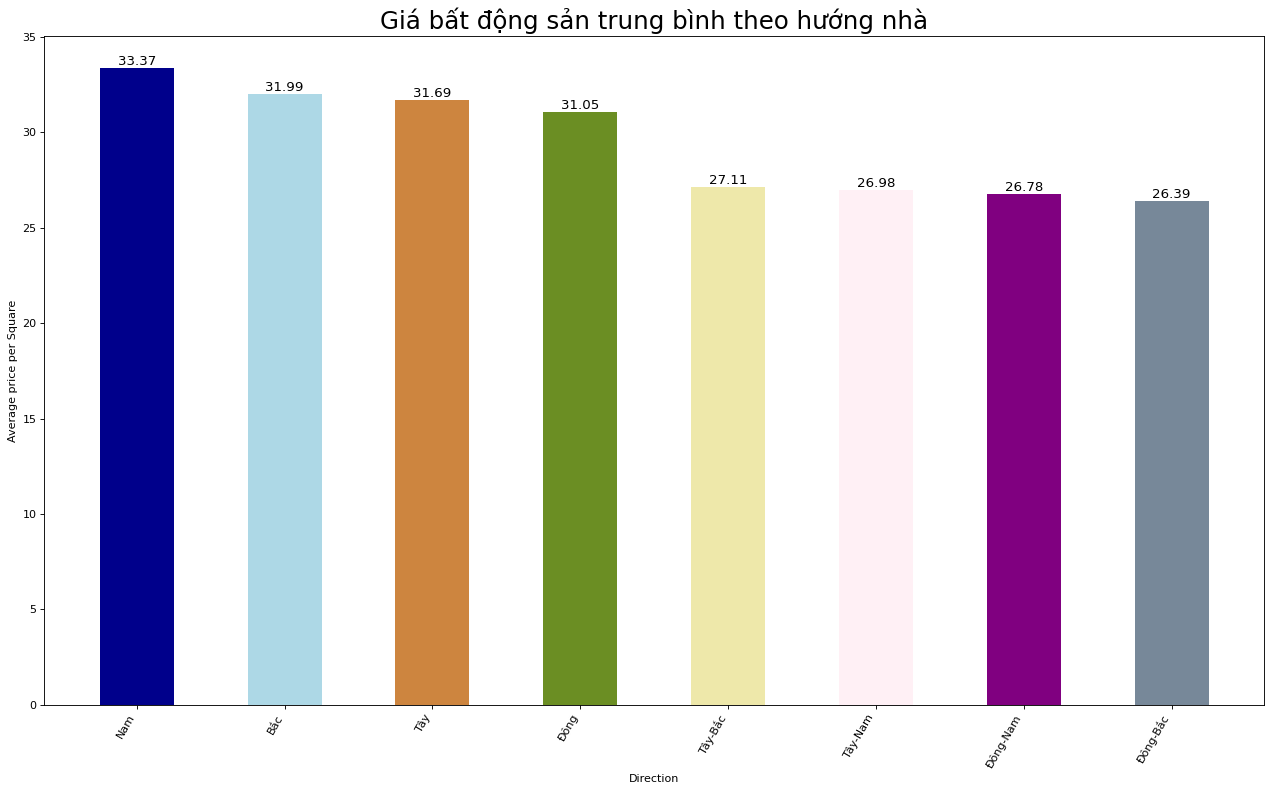

In [103]:
df12 = newdf.groupby('direction')['price_per_square'].mean().reset_index(name = 'average_price').sort_values(by = 'average_price', ascending= False).head(20)

n = df12['direction'].unique().__len__()
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k = n)

plt.figure(figsize = (16, 10), dpi = 80)
bars = plt.bar(df12['direction'], df12['average_price'], color = c, width = 0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height,                             
        f'{height:.2f}',                   
        ha = 'center', va = 'bottom',           
        fontsize = 12, fontweight = 500 
    )

plt.xticks(df12['direction'], rotation = 60, horizontalalignment= 'right')
plt.title("Giá bất động sản trung bình theo hướng nhà", fontsize = 22)
plt.ylabel("Average price per Square") 
plt.xlabel("Direction")
plt.tight_layout()
plt.show()

['Công ty CP Đầu tư Trúc Bạch' 'Tập đoàn Sun Group'
 'Tập đoàn Jaccar Bourbon' 'Công ty Liên doanh Hà Việt – Tungshing'
 'Công ty TNHH Đầu tư C.T.L' 'Công ty CP Đầu tư Phát triển nhà Gia Bảo'
 'Công ty CP Tân Phú Long'
 'Tổng công ty Xây dựng Thanh Hóa - Công ty Cổ phần'
 'Công ty CP ACC - Thăng Long' 'Tập đoàn BRG']


/var/folders/x9/zf9kk88j6wnc8jwvzqvyvv3r0000gn/T/ipykernel_54736/792547277.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(df9['investor'], rotation = 60, horizontalalignment = 'right')


Text(0.5, 1.0, 'Giá bất động sản phân bố theo top 10 nhà đầu tư (triệu /m2)')

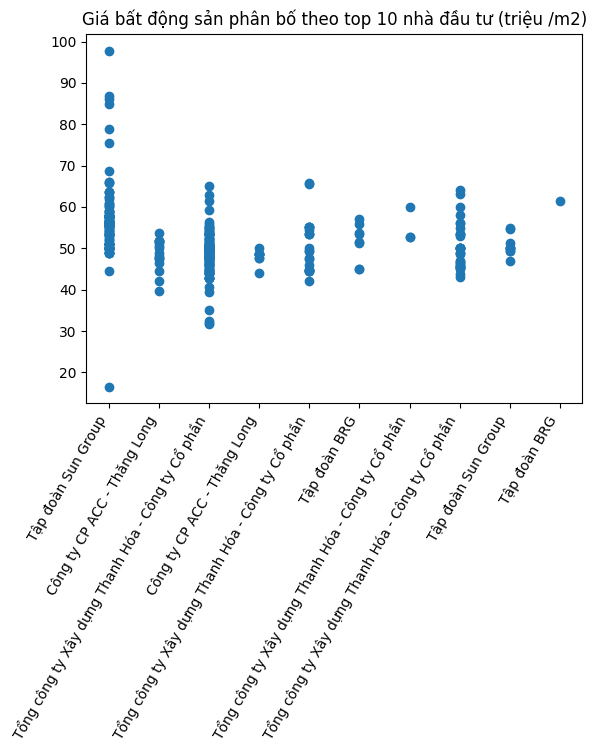

In [86]:
invest = newdf[newdf['investor'].notnull()]
invest = invest.groupby('investor')['price_per_square'].mean().reset_index(name='amount of money')
invest = invest.sort_values(by = 'amount of money', ascending = False).head(10)
topInvest = invest['investor'].unique()
print(topInvest)
df9 = newdf.loc[newdf['investor'].isin(topInvest)]
 
plt.scatter(df9.investor, df9.price_per_square)
plt.gca().set_xticklabels(df9['investor'], rotation = 60, horizontalalignment = 'right')
plt.title("Giá bất động sản phân bố theo top 10 nhà đầu tư (triệu /m2)")

/var/folders/x9/zf9kk88j6wnc8jwvzqvyvv3r0000gn/T/ipykernel_54736/3614075808.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(df10['project'], rotation = 60, horizontalalignment = 'right')


Text(0.5, 1.0, 'Giá bất động sản phân bố theo dự án')

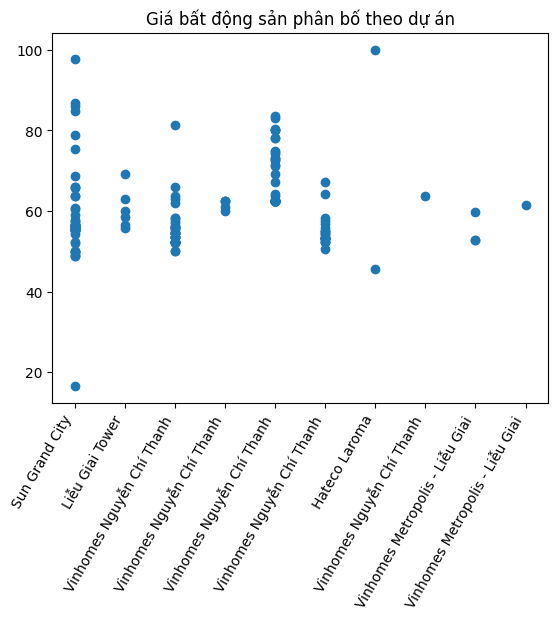

In [99]:
prj = newdf[newdf['project'].notnull()]
prj = prj.groupby('project')['price_per_square'].mean().reset_index(name = 'amount of money').sort_values(by = 'amount of money', ascending = False).head(10)
topprj = prj['project'].unique()
df10 = newdf[newdf['project'].isin(topprj)]
 
plt.scatter(df10.project, df10.price_per_square)
plt.gca().set_xticklabels(df10['project'], rotation = 60, horizontalalignment = 'right')
plt.title("Giá bất động sản phân bố theo dự án")

In [97]:
print(topprj)

['Hà Nội Golden Lake' 'Vinhomes Metropolis - Liễu Giai'
 'Sun Grand City Quảng An Residence' 'Hateco Laroma' 'Trúc Bạch Building'
 'Liễu Giai Tower' 'Sun Grand City' 'Vinhomes Nguyễn Chí Thanh'
 'Pacific Place' 'Hoàng Cầu Skyline']


/var/folders/x9/zf9kk88j6wnc8jwvzqvyvv3r0000gn/T/ipykernel_54736/2747934797.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(df11['direction'], rotation = 60, horizontalalignment = 'right')


Text(0.5, 1.0, 'Giá bất động sản phân bố theo hướng nhà')

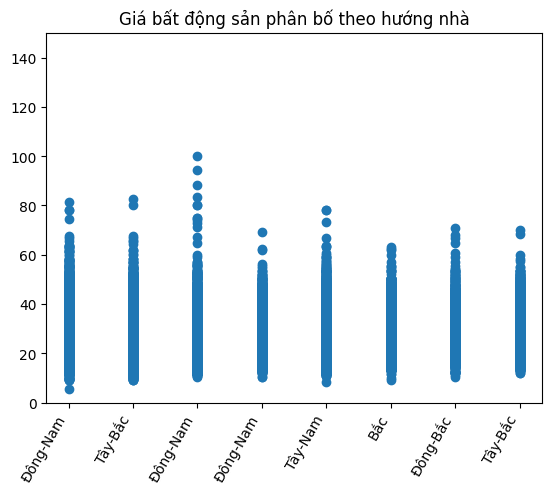

In [102]:
direc = newdf[newdf['direction'].notnull()]
direc = direc.groupby('direction')['price_per_square'].mean().reset_index(name = 'amount of money')
direc = direc.sort_values(by = 'amount of money', ascending = False)
direc = direc['direction'].unique()
df11 = newdf.loc[newdf['direction'].isin(direc)]
 
plt.ylim(0,150)

plt.scatter(df11.direction, df11.price_per_square)
plt.gca().set_xticklabels(df11['direction'], rotation = 60, horizontalalignment = 'right')
plt.title("Giá bất động sản phân bố theo hướng nhà")

<Axes: >

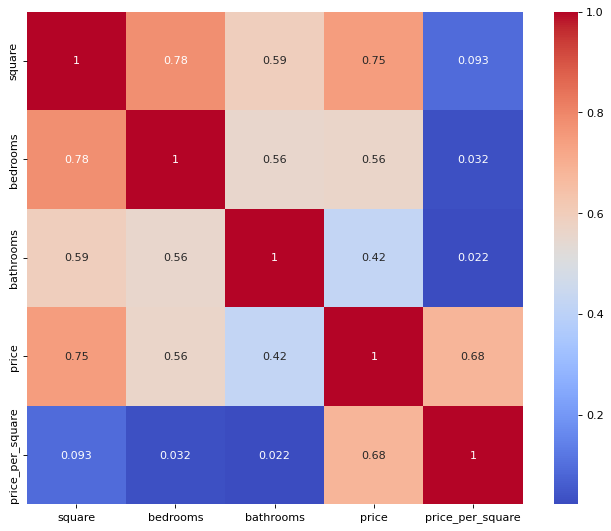

In [108]:
df13 = newdf.select_dtypes(include = ['int64', 'float64']).drop(columns=['id', 'month'])

plt.figure(figsize = (10, 8), dpi = 80)
sns.heatmap(df13.corr(), annot = True, cmap = 'coolwarm')

<Figure size 800x640 with 0 Axes>

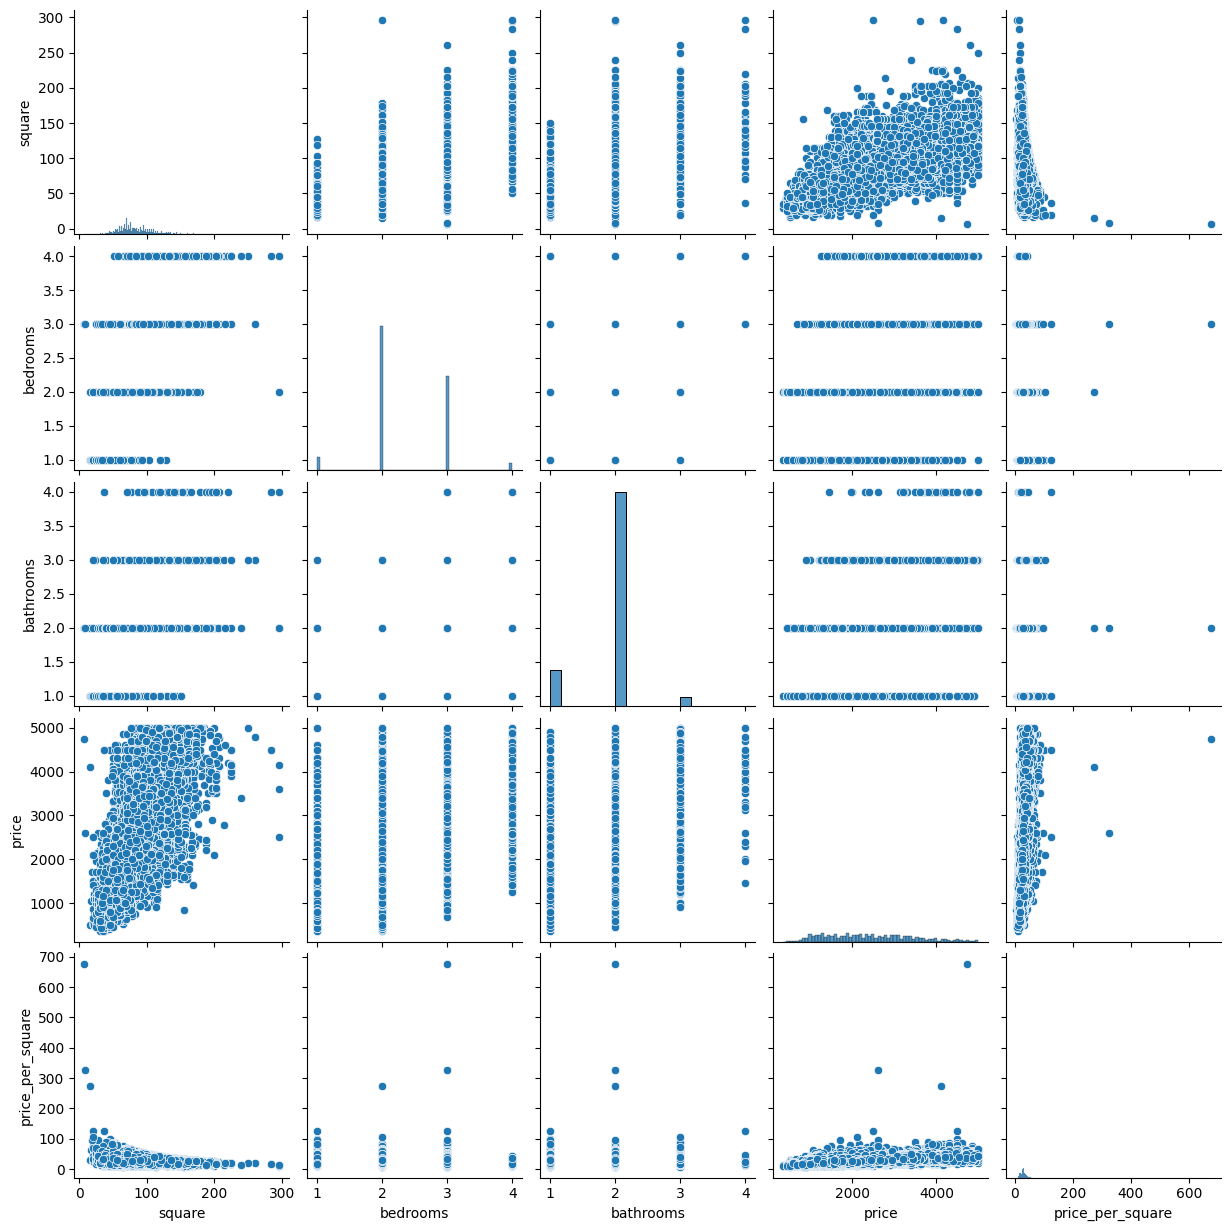

In [110]:
plt.figure(figsize = (10, 8), dpi = 80)
sns.pairplot(newdf, 
             vars = ['square', 'bedrooms', 'bathrooms', 'price', 'price_per_square'], kind = 'scatter')  

(0.0, 100.0)

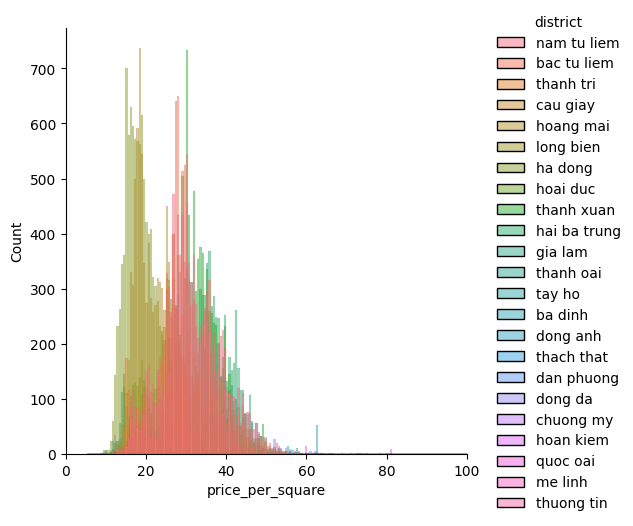

In [112]:
sns.displot(newdf, x = "price_per_square", hue = "district")
plt.xlim(0, 100)